# Question 4: Miniproject
----
### Cell type classification 

## 0. Setting 

In [255]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
base_path = os.getcwd()
base_path = base_path.replace('notebooks', 'scripts') # note: if you have notebooks twice in your base_path, this won't work
sys.path.insert(1, base_path)

from helpers import *
from utils import remove_top_right_frame, jitter_scatterplot

In [257]:
class_color = {'EXC':'k',
               'PV':'indianred',
               'VIP':'royalblue',
               'SST':'darkorange'} 
cell_class_order = ['EXC', 'PV', 'VIP', 'SST']

## 1. Data Extraction

In [258]:
# Load data raw
main_dir = r'/Users/barbaragrosjean/Desktop/BIO482_MiniProject_2024_Python' 
print('Main working directory:', main_dir)
figure_path = os.path.join(main_dir, 'Figures')
os.makedirs(figure_path, exist_ok=True)
data_path = os.path.join(main_dir, 'Data')

fname = 'data_bio482.pkl'
data_df = pd.read_pickle(os.path.join(data_path, fname))

Main working directory: /Users/barbaragrosjean/Desktop/BIO482_MiniProject_2024_Python


## Cell properties

### PART0

In [259]:
data_df.head()

Cell_APThreshold_Slope Cell_Anatomy  Cell_Counter  Cell_Depth  Cell_ID  \
0                    10.0         L2/3           1.0       229.0  SC901_1   
1                    10.0         L2/3           1.0       229.0  SC901_1   
2                    10.0         L2/3           1.0       229.0  SC901_1   
3                    10.0         L2/3           1.0       229.0  SC901_1   
4                    10.0         L2/3           1.0       229.0  SC901_1   

  Cell_Layer Cell_TargetedBrainArea Cell_Type Cell_tdTomatoExpressing  \
0       L2/3                     C2       EXC                   False   
1       L2/3                     C2       EXC                   False   
2       L2/3                     C2       EXC                   False   
3       L2/3                     C2       EXC                   False   
4       L2/3                     C2       EXC                   False   

   Mouse_DateOfBirth  ... Sweep_Counter  \
0                NaN  ...           1.0   
1                NaN  ...           2.0   
2                NaN  ...           3.0   
3                NaN  ...           4.0   
4                NaN  ...           5.0   

                             Sweep_MembranePotential  \
0  [-0.044009375, -0.044028125, -0.0439875, -0.04...   
1  [-0.046275, -0.04629375, -0.046259375, -0.0462...   
2  [-0.041896875, -0.0419125, -0.041909375, -0.04...   
3  [-0.04655625, -0.0465875, -0.046575, -0.046596...   
4  [-0.047296875, -0.047284375, -0.047265625, -0....   

  Sweep_MembranePotential_SamplingRate  \
0                              20000.0   
1                              20000.0   
2                              20000.0   
3                              20000.0   
4                              20000.0   

                           Sweep_PassiveContactTimes  \
0  [[4.567, 4.713], [7.327, 7.519], [14.481, 14.6...   
1  [[15.274999999999999, 15.375], [16.247, 16.643...   
2  [[4.347000000000001, 7.0390000000000015], [8.2...   
3                                                nan   
4  [[4.411000000000001, 4.4809999999999945], [5.2...   

                                    Sweep_QuietTimes Sweep_StartTime  \
0  [[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...          2005.0   
1  [[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...          2005.0   
2      [[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]          2005.0   
3  [[0.002, 2.764], [12.03, 14.464], [14.814, 15....          2005.0   
4  [[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...          2005.0   

        Sweep_Type                                 Sweep_WhiskerAngle  \
0     active touch  [2.740000000000009, 2.740000000000009, 2.74000...   
1     active touch  [2.680000000000007, 2.680000000000007, 2.68000...   
2  passive contact  [1.4958937492820894, 1.5019819900587095, 1.509...   
3     active touch  [2.467493802679826, 2.459711310964792, 2.46562...   
4     active touch  [2.4399999999999977, 2.4399999999999977, 2.440...   

  Sweep_WhiskerAngle_SamplingRate  \
0                           100.0   
1                           100.0   
2                           100.0   
3                           100.0   
4                           100.0   

                                 Sweep_WhiskingTimes  
0                  [[6.118, 6.326], [7.942, 13.856]]  
1  [[4.7, 5.196], [6.696, 11.15], [12.032, 13.006...  
2                    [[2.15, 3.652], [4.362, 5.848]]  
3  [[2.766, 12.026], [15.626, 18.406], [18.814, 1...  
4  [[5.228, 5.624], [7.462, 8.022], [11.002, 15.2...  

[5 rows x 24 columns]

In [260]:
# Cell ID
# We do have several data for the same cell but we don't need to distinguish them
data_df['Cell_ID'].value_counts()

Cell_ID
AP068_1    27
CG016_2    16
AP061_1    16
JP906_1    15
AP066_2    13
           ..
TK325_1     1
TK326_1     1
TK333_2     1
TK499_3     1
TK309_1     1
Name: count, Length: 240, dtype: int64

In [305]:
# Cell_Counter WTF??
data_df['Cell_Counter'].value_counts()

Cell_Counter
1.0    566
2.0    189
3.0     51
4.0     17
5.0      8
Name: count, dtype: int64

In [306]:
# Cell_tdTomatoExpressing WTF??
data_df['Cell_tdTomatoExpressing'].value_counts()

Cell_tdTomatoExpressing
True     548
False    283
Name: count, dtype: int64

In [307]:
# Mouse Genotype WTF??
data_df['Mouse_Genotype'].value_counts()

Mouse_Genotype
Sst-Cre                              279
C57Bl6j                              199
PV-Cre                               184
VIP_IRES_Cre                          61
Scnn1a-Cre                            52
VIP-Cre                               35
B6(Cg)-Etv1<tm1.1(cre/ERT2)Zjh>/J     21
Name: count, dtype: int64

In [336]:
# keep :
# Properties 
part0 = data_df[['Cell_ID','Cell_Depth','Cell_Layer', 'Cell_TargetedBrainArea', 'Cell_Type']]

In [337]:
# is cell anatomy the same as cell layer ? # TODO

In [338]:
# remove the nan in cell depth 
mask = np.isnan(part0.Cell_Depth)
mask = [not m for m in mask]
part0 = part0[mask]

# remove the pb in cell targetedBrain area 
part0 = part0[part0.Cell_TargetedBrainArea != 'C2?']

for col in ['Cell_Depth','Cell_Layer','Cell_TargetedBrainArea', 'Cell_Type'] : 
    print(part0[col].unique())

print(len(part0))

[229. 350. 550. 244. 250. 212. 140. 650. 335. 225. 198. 516. 500. 200.
 150. 190. 300. 160. 320. 170. 330. 348. 305. 396. 223. 197. 360. 340.
 560. 665. 551. 571. 586. 601. 496. 523. 432. 440. 266. 381. 156. 256.
 354. 215. 213. 357. 314. 219. 288. 439. 410. 470. 403. 341. 582. 531.
 557. 533. 607. 630. 337. 327. 437. 333. 220. 616. 568. 451. 450. 452.
 480. 445. 490. 474. 399. 292. 263. 135. 124. 120. 141. 164. 231. 387.
 427. 429. 491. 467. 529. 462. 364. 538. 547. 497. 476. 528. 507. 521.
 514. 457. 424. 477. 473. 456. 461. 147. 154. 102. 123. 235. 227.  98.
 146. 125. 155. 207. 143. 100. 126. 149. 152.  97. 245. 184. 172. 174.
 240. 338. 368. 400. 234. 374. 443. 423. 463. 375. 222. 211. 233. 436.
 448. 425. 525. 469. 460. 430. 415. 444. 449. 269. 185. 264. 435. 570.
 169. 167. 199. 434. 465. 390. 455. 481. 421. 204. 180. 351. 391. 380.
 122. 175. 110. 113. 128. 130. 153. 157. 145. 158. 188. 196. 192. 232.
 205. 216. 176. 210. 178. 208. 194.]
['L2/3' 'L5' 'L4']
['C2' 'S1']
['EXC' 'P

In [339]:
for col in part0.columns[1:] : 
    print(col, np.unique(part0[col].isna()))

Cell_Depth [False]
Cell_Layer [False]
Cell_TargetedBrainArea [False]
Cell_Type [False]


In [340]:
part0.rename(columns={'Cell_ID':'cell_id'}, inplace=True)
part0.rename(columns={'Cell_Type':'cell_type'}, inplace=True)

In [341]:
# Remove the duplicat 
part0 = part0.drop_duplicates()
part0 = part0.reset_index()

In [342]:
len(part0)

237

### part1

In [215]:
sweep_type = 'free whisking'
time_window = 2    # time window to analyze Vm (s)
freq_band_lim = [1, 10, 30, 90] # low- and high-frequency band limits (Hz)

data_df_subset = data_df[data_df['Sweep_Type']==sweep_type] 
all_cells = np.unique(data_df_subset.Cell_ID)

verbose=False #set to 0 to hide individual AP plots

# Initialize a dictionary to store data for all cell
result_dict = {'cell_id': all_cells, 
          'cell_type':[], # required for cell-type identification
          # Data we'll collect for Part 1a
          'firing_rate': [], 
          'ap_threshold': [], 
          'ap_duration': [], 
          # Data we'll collect for Part 1b
          'mean_vm':[],
          'std_vm':[],
          'fft_low':[],
          'fft_high':[]
        }

result_fft_cell_type = {'EXC':[],'SST':[], 'VIP':[],'PV':[]}

exc_cell_counter = 0

# Iterate over each cell identities to collect desired data
cell_list = sorted(np.unique(data_df_subset.Cell_ID), reverse=True) #NOTE: DO NOT START WITH AC32 bc. no AP and undefined ap_params content
for idx, cell in enumerate(cell_list):
    if idx%100==0:
        print('Cell {}/{}'.format(idx, np.unique(data_df_subset.Cell_ID).shape[0]))
    
    # Get mouse name and cell number from cell identifier
    mouse = cell.split('_')[0]
    cell_count = float(cell.split('_')[1])
    
    # Get data subset for that cell
    cell_df = data_df_subset[data_df_subset.Cell_ID==cell]
    
    # Get cell type 
    cell_type = cell_df.Cell_Type.values[0]
    result_dict['cell_type'] += [cell_type]
    
    # Get sweeps/trials recorded for that cell, that we are going to iterate over
    trial_list = cell_df.Sweep_Counter.values
    
    # Init. cell recording specific quantities: a unique duration, yielding a unique number of APs
    tot_rec_duration = 0
    tot_number_ap = 0
    
    # Initialize empty lists to get data for each trial/sweep
    # Part 1a
    tot_ap_thresh = []
    tot_ap_duration = []
    # Part 1b
    tot_mean_vm = []
    tot_std_vm = []
    tot_fft = []
    
    # For that cell, iterate over trials
    for trial in trial_list:
        #if idx % 100 == 0: # print every 100 iteration  
            #print('Cell {},  trial {}'.format(cell, int(trial)))
        if cell_type == 'EXC':
            exc_cell_counter += 1
        
        # Get current trial data
        cell_trial_df = cell_df[cell_df.Sweep_Counter==trial]
        
        # Get the sampling rate and membrane potential (and derivative) from that sweep
        sr_vm = cell_trial_df['Sweep_MembranePotential_SamplingRate'].values[0] #[0] to get the content of the array
        membrane_potential = cell_trial_df['Sweep_MembranePotential'].values[0]
        ap_vm_deriv_thresh = cell_trial_df['Cell_APThreshold_Slope'].values[0]
        
        # Get and update recording duration for that cell by adding trial duration
        trial_rec_duration = len(membrane_potential)/sr_vm
        tot_rec_duration += trial_rec_duration
        
        # Detection of action potentials for that trial, and update total number of APs for that cell
        #ap_params = None
        ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh) 
        tot_number_ap += ap_params.shape[0]
          
        # Check if this trial contains any AP...
        ap_duration = []
        if (ap_params.any()):
            ap_thresh_times = ap_params[:,0]
            ap_thresh_vm = ap_params[:,1]
            ap_peak_times = ap_params[:,2]
            ap_peak_vm = ap_params[:,3]
            ap_duration = ap_params[:,5] #check for no-APs (cells with no spikes in ALL trials:EXC5,16 FR=0, AP_dur=np.nan)

            #... if so, cut-out individual APs to keep subthreshold Vm only
            vm_sub = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)
            
            
        # Else if no AP, subthreshold Vm is just Vm
        else:
            
            vm_sub = membrane_potential.copy()

        # Once Vm_sub is obtained:
        # Compute subthreshold Vm mean and standard deviation
        mean_vm, std_vm = Function_SubThrsVm(vm_sub, sr_vm, trial_rec_duration)
        
        # Compute trial FFT
        fft = Function_Compute_FFTs(vm_sub, sr_vm, time_window)
        
        #Update current variables from the current trial
        # Part 1a
        tot_ap_thresh += [np.concatenate([ap_thresh_vm])]
        tot_ap_duration += [ap_duration]
        # Part 1b
        tot_mean_vm += [mean_vm]
        tot_std_vm += [std_vm]
        tot_fft +=  [fft]
        
        # Optional plotting: show AP and AP peak times
        ap_peak_index=np.round(ap_peak_times * sr_vm)  
        if verbose:
            fig, ax = plt.subplots(1,1, figsize=(10,2), dpi=300)
            remove_top_right_frame(ax)
            ax.set_title('Cell {},  trial {}'.format(cell, int(trial)))
            ax.plot(membrane_potential, lw=0.5,  zorder=0)
            ax.scatter(ap_peak_index, ap_peak_vm, lw=0.5, marker='+', color='r')
            ax.set_xlabel('Time (samples)')
            ax.set_ylabel('Membrane \n potential (V)')
            plt.show()

    # Once iterated over all trials for that cell, append cell data lists to the result dictionary
  
    # Part 1a
    result_dict['firing_rate'] += [tot_number_ap / tot_rec_duration] # <- just the firing rate formula
    result_dict['ap_threshold'] += [np.nanmean(np.concatenate(tot_ap_thresh))] #<-concatenate trials, get trial-average
    result_dict['ap_duration'] += [np.nanmean(np.concatenate(tot_ap_duration))]

    
    # Part 1b
    result_dict['mean_vm'] += [np.nanmean(np.concatenate(tot_mean_vm))]
    result_dict['std_vm'] += [np.nanmean(np.concatenate(tot_std_vm))]
    
    # Compute mean FFT over trials
    tot_fft = np.nanmean(np.concatenate(tot_fft, axis=1), 1)
    #Store mean cell FFT
    result_fft_cell_type[cell_type] += [tot_fft] 
    
    # We need to find which point (sample) in the FFT correspond to which frequency
    pt1 = int(freq_band_lim[0] * fft.shape[0] / (sr_vm/2) ) + 1 #1Hz into FFT point
    pt2 = int(freq_band_lim[1] * fft.shape[0] / (sr_vm/2) ) + 1 #int: slicing requires integers
    result_dict['fft_low'] += [tot_fft[pt1:pt2].mean()]
    
    pt3 = int(freq_band_lim[2] * fft.shape[0] / (sr_vm/2) ) + 1
    pt4 = int(freq_band_lim[3] * fft.shape[0] / (sr_vm/2) ) + 1 
    result_dict['fft_high'] += [tot_fft[pt3:pt4].mean()]

## Convert each dictionary lists as numpy arrays (convenient to make dataframes)
result_dict = {key: np.array(result_dict[key]) for key in result_dict.keys()}

print('Done!')

Cell 0/232
Cell 100/232


/Users/barbaragrosjean/Desktop/BIO482-miniproject/scripts/helpers.py:18: RuntimeWarning: invalid value encountered in divide
  AP_Thrs_Onset = np.diff(np.divide(Vm_Deriv - Vm_Deriv_Thrs, np.abs(Vm_Deriv - Vm_Deriv_Thrs)))
/var/folders/rr/sx7rgrrj3p12hz70crvxqcjc0000gn/T/ipykernel_30582/1589681479.py:136: RuntimeWarning: Mean of empty slice
  result_dict['ap_duration'] += [np.nanmean(np.concatenate(tot_ap_duration))]


Cell 200/232


/Users/barbaragrosjean/Desktop/BIO482-miniproject/scripts/helpers.py:52: RuntimeWarning: invalid value encountered in divide
  sAP_OnOff = np.diff(np.divide(sAP_Seg, np.abs(sAP_Seg)))  # compute the binary signal


Done!


In [216]:
part1 = pd.DataFrame(result_dict)
part1.head()

cell_id cell_type  firing_rate  ap_threshold  ap_duration   mean_vm  \
0  AP032_1       EXC     0.875000     -0.040795     0.608929 -0.064378   
1  AP032_2       EXC     1.857143     -0.040812     0.993269 -0.056189   
2  AP035_1       EXC     2.100000     -0.037562     0.786111 -0.058273   
3  AP035_2       EXC     0.900000     -0.031695     0.849537 -0.055222   
4  AP039_1       EXC     0.566667     -0.040215     0.866176 -0.060517   

     std_vm   fft_low  fft_high  
0  0.005948  0.000763  0.000070  
1  0.005208  0.000635  0.000090  
2  0.006374  0.000775  0.000053  
3  0.006061  0.000837  0.000069  
4  0.004220  0.000513  0.000054

In [217]:
# remove the cell type 
part1 = part1.drop(columns = 'cell_type')

### part2

In [218]:
sweep_type = 'free whisking'

pre_window = 0.5 # time before whisking onset (s)
post_window = 0.5 # time after whisking onset (s)
min_event_dur = 0.2 # minimal duration of whisking episode to be considered
min_iti = 0.5 # minimal intertrial interval (ITI) between 2 consecutive whisking episode (s)
min_number_trials = 2 # minimal number of trial
bin_size = 0.05 # bin size for psth (s)
epoch_bounds = {'pre':[-0.5, -0.3],
                  'post':[0,0.2]}  # time boundaries to compute changes in whisker protraction (WP), or Vmverbose=0 #set to 0 to hide individual AP plots

# Initialize a dictionary to store data for all cell
result_dict = {'cell_id': all_cells, 
          'cell_type':[], 
          # This is a template, an example with whisker protraction
          'numb_events': [],
          'wp_avg': [],
          'wp_amplitude_pre': [],
          'wp_amplitude_post': [],
          # Sub. Vm
          'vm_avg': [], 
          'vm_amplitude_pre': [],
          'vm_amplitude_post': [],
          # Firing rates
          'ap_avg':[],
          'ap_psth':[],
          'ap_fr_pre':[],
          'ap_fr_post':[]
        }
    
# Iterate over each cell identities to collect desired data
for idx, cell in enumerate(np.unique(data_df_subset.Cell_ID)):
    if idx%100==0:
        print('Cell {}/{}'.format(idx, np.unique(data_df_subset.Cell_ID).shape[0]))
    
    # Get mouse name and cell number from cell identifier
    mouse = cell.split('_')[0]
    cell_count = float(cell.split('_')[1])
    
    # Get data subset for that cell
    cell_df = data_df_subset[data_df_subset.Cell_ID==cell]
    
    # Get cell type 
    cell_type = cell_df.Cell_Type.values[0]
    result_dict['cell_type'] += [cell_type]
    
    # Get sweeps/trials recorded for that cell, that we are going to iterate over
    trial_list = cell_df.Sweep_Counter.values
    
    # Init. cell recording specific quantities: a unique duration, yielding a unique number of APs
    tot_rec_duration=0
    tot_number_ap=0
    
    # Initialize empty lists to get data for each trial/sweep
    tot_ap_thresh = []
    tot_ap_duration= []
    
    # Template
    tot_wp_events = []
    
    # Vm and AP FR
    tot_vm_events = []
    tot_ap_events = []
    
    ## For that cell, iterate over trials
    for trial in trial_list:
        
        # Get current trial data
        cell_trial_df = cell_df[cell_df.Sweep_Counter==trial]
        
        # Get event times for that trial
        event_times = cell_trial_df['Sweep_WhiskingTimes'].values[0]

        if event_times is None: # skip when there are no events
            continue
        
        # Get the sampling rate and membrane potential (and derivative) from that sweep
        sr_vm = cell_trial_df['Sweep_MembranePotential_SamplingRate'].values[0] #[0] to get the content of the array
        membrane_potential = cell_trial_df['Sweep_MembranePotential'].values[0]
        ap_vm_deriv_thresh = cell_trial_df['Cell_APThreshold_Slope'].values[0]
        
        # Template: extract whisker angle and sampling rate of whisker video data
        whisker_angle = cell_trial_df['Sweep_WhiskerAngle'].values[0]
        sr_wp = cell_trial_df['Sweep_WhiskerAngle_SamplingRate'].values[0]
        
         # Get and update recording duration for that cell by adding trial duration
        trial_rec_duration = len(membrane_potential)/sr_vm
        tot_rec_duration += trial_rec_duration
        
        # Detection of action potentials for that trial, and update total number of APs for that cell
        #ap_params = None
        ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh) 
        tot_number_ap += ap_params.shape[0]
        
                
        # Check if this trial contains any AP...
        ap_duration = []
        if (ap_params.any()):
            ap_thresh_times = ap_params[:,0]
            ap_thresh_vm = ap_params[:,1]
            ap_peak_times = ap_params[:,2]
            ap_peak_vm = ap_params[:,3]
            ap_duration = ap_params[:,5] #check for no-APs (cells with no spikes in ALL trials:EXC5,16 FR=0, AP_dur=np.nan)

             #... if so, cut-out individual APs to keep subthreshold Vm only
            vm_sub = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)
            
            #For APs, make an analog binary vector of same dimensions as Vm_Sub
            vec_length = len(vm_sub)
            ap_vect = Function_Times2Vect(ap_peak_times, sr_vm, vec_length)
            
        # Else if no AP, subthreshold Vm is just Vm
        else:
            vm_sub = membrane_potential.copy()
            ap_vect = np.zeros_like(vm_sub) #empty vector of size Vm_Sub
            
        # Once trial event times and data is collected, use this function to extract data aligned to event onset
        # -> check function (Function_Event_Triggered_Signal) parameters and code!
        # -> input data can be whatever, given a certain dimensions
        # -> events can be whatever
        # -> adjust sampling rate for data type (e.g. video, Vm)! 
        
        wp_event = Function_Event_Triggered_Signal(whisker_angle, sr_wp, 
                                                   event_times, pre_window, post_window, min_event_dur, min_iti)
        vm_event = Function_Event_Triggered_Signal(vm_sub, sr_vm, 
                                                   event_times, pre_window, post_window, min_event_dur, min_iti)
        ap_event = Function_Event_Triggered_Signal(np.squeeze(ap_vect), sr_vm, 
                                                   event_times, pre_window, post_window, min_event_dur, min_iti)


        # Missing data in original .mat file is encoded as -1, so this skips entires with missing data
        if type(wp_event) == int:
            continue
        if type(vm_event) == int:
            continue
        if type(ap_event) == int:
            continue
                 
        # Append each event-triggered vector and stack to an array 
        tot_wp_events += [wp_event]
        tot_wp_array = np.hstack(tot_wp_events)
        
        tot_vm_events+= [vm_event]
        tot_vm_array=np.hstack(tot_vm_events)
        
        tot_ap_events+= [ap_event]
        tot_ap_array=np.hstack(tot_ap_events)
        

    # Compute means only if a certain number of trials is present
    n_events = tot_wp_array.shape[1]
    if (n_events >= min_number_trials):
        result_dict['numb_events'] += [n_events] 
        
        # Calculate trial-averaged signals
        #Template: WP
        wp_avg = np.mean(tot_wp_array, 1) 
        result_dict['wp_avg'] += [wp_avg] #add for that cell
        
        vm_avg = np.mean(tot_vm_array, 1) 
        result_dict['vm_avg'] += [vm_avg]
        
        ap_avg = np.mean(tot_ap_array, 1) 
        result_dict['ap_avg'] += [ap_avg]
        
        ap_psth=Function_PSTH(ap_avg, sr_vm, pre_window, post_window, bin_size)
        result_dict['ap_psth'] += [ap_psth[:,1]]
        
        
        #for epoch in range(wp_bounds.shape[0]): 
        for epoch in epoch_bounds.keys():
            
            # Template: whisker protraction
            # Get bound of that epoch (pre/post)
            bound_1=int(np.round((epoch_bounds[epoch][0]+pre_window)*sr_wp))
            bound_2=int(np.round((epoch_bounds[epoch][1]+pre_window)*sr_wp-1))
            
            #Get mean in pre/post epoch
            if epoch=='pre':
                result_dict['wp_amplitude_pre'] += [wp_avg[bound_1:bound_2].mean(0)]
            else:
                result_dict['wp_amplitude_post'] += [wp_avg[bound_1:bound_2].mean(0)]
                
            # Vm, and AP firing rate
            bound_1=int(np.round((epoch_bounds[epoch][0]+pre_window)*sr_vm)) #sr_vm !
            bound_2=int(np.round((epoch_bounds[epoch][1]+pre_window)*sr_vm-1))
            
            if epoch=='pre':
                result_dict['vm_amplitude_pre'] += [vm_avg[bound_1:bound_2].mean(0) * 1000] #in mV!
                result_dict['ap_fr_pre'] += [ap_avg[bound_1:bound_2].mean(0) * sr_vm]       #in Hz!
            else:
                result_dict['vm_amplitude_post'] += [vm_avg[bound_1:bound_2].mean(0) * 1000] #in Hz!
                result_dict['ap_fr_post'] += [ap_avg[bound_1:bound_2].mean(0) * sr_vm]
                
                
    #If there are less trials than necessary, set to NaNs (exclude data)
    else:
        result_dict['numb_events'] += [n_events]
        
        #Template: WP
        wp_avg=np.nan*np.empty_like(wp_avg)
        result_dict['wp_avg'] += [wp_avg]
        result_dict['wp_amplitude_pre'] += [np.nan]
        result_dict['wp_amplitude_post'] += [np.nan]
        
        # VM
        vm_avg=np.nan*np.empty_like(vm_avg)
        result_dict['vm_avg'] += [vm_avg]
        result_dict['vm_amplitude_pre'] += [np.nan]
        result_dict['vm_amplitude_post'] += [np.nan]
        
        #AP firing rate
        ap_avg=np.nan*np.empty_like(ap_avg)
        result_dict['ap_avg'] += [ap_avg]
        ap_psth=Function_PSTH(ap_avg, sr_vm, pre_window, post_window, bin_size)
        result_dict['ap_psth'] += [ap_psth[:,1]]
        
        result_dict['ap_fr_pre'] += [np.nan]
        result_dict['ap_fr_post'] += [np.nan]

                         
# Convert each dictionary lists as numpy arrays
result_dict = {key: np.array(result_dict[key]) for key in result_dict.keys()}

#Init. dataframe size
result_df = pd.DataFrame(index=range(np.unique(data_df_subset.Cell_ID).shape[0]),
             columns=result_dict.keys())

for key in result_dict.keys():
    result_df[key] = result_dict[key] #this works for scalars
    
# For array-based data, one must give a list to assign to dataframe column
# Template: WP
result_df['wp_avg'] = list(result_dict['wp_avg'])

result_df['vm_avg'] = list(result_dict['vm_avg'])
result_df['ap_avg'] = list(result_dict['ap_avg'])
result_df['ap_psth'] = list(result_dict['ap_psth'])

# times for the bins of the psth
psth_time=ap_psth[:,0]

print('Done!')

Cell 0/232


/Users/barbaragrosjean/Desktop/BIO482-miniproject/scripts/helpers.py:52: RuntimeWarning: invalid value encountered in divide
  sAP_OnOff = np.diff(np.divide(sAP_Seg, np.abs(sAP_Seg)))  # compute the binary signal
/Users/barbaragrosjean/Desktop/BIO482-miniproject/scripts/helpers.py:18: RuntimeWarning: invalid value encountered in divide
  AP_Thrs_Onset = np.diff(np.divide(Vm_Deriv - Vm_Deriv_Thrs, np.abs(Vm_Deriv - Vm_Deriv_Thrs)))


Cell 100/232
Cell 200/232
Done!


In [219]:
# keep wp_amplitude_pre, wp_amplitude_post, vm_amplitude_pre, vm_amplitude_post, ap_fr_pre, ap_fr_post
part2 = result_df[['cell_id', 'cell_type', 'wp_amplitude_pre','wp_amplitude_post', 'vm_amplitude_pre', 'vm_amplitude_post', 'ap_fr_pre', 'ap_fr_post' ]]
part2.head()

cell_id cell_type  wp_amplitude_pre  wp_amplitude_post  vm_amplitude_pre  \
0  AP032_1        PV       -139.536777        -135.226516        -55.504155   
1  AP032_2        PV       -139.157622        -134.807553        -48.994021   
2  AP035_1        PV       -131.406960        -125.811327        -54.334653   
3  AP035_2        PV       -132.794568        -118.696745        -50.060496   
4  AP039_1       SST       -146.466663        -138.432118        -57.928339   

   vm_amplitude_post  ap_fr_pre  ap_fr_post  
0         -55.399560  23.241104   27.065590  
1         -50.584425  30.007502    8.752188  
2         -59.056842  24.381095    7.501875  
3         -53.241710  39.176461   19.588230  
4         -62.284089   0.000000    0.000000

In [220]:
# Add to the columns the label for the exp
part2.columns += '_FW'
part2.rename(columns={'cell_id_FW':'cell_id'}, inplace=True)

/var/folders/rr/sx7rgrrj3p12hz70crvxqcjc0000gn/T/ipykernel_30582/3503326707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part2.rename(columns={'cell_id_FW':'cell_id'}, inplace=True)


In [221]:
part2 = part2.drop(columns = 'cell_type_FW')

### Part3

In [222]:
sweep_type = 'active touch'

pre_window = 0.1 # time before touch onset (s)
post_window = 0.3 # time after touch onset (s)
min_event_dur = 0 # minimal duration of active touch episode to be considered
min_iti = 0.2 # minimal intertrial interval (ITI) between 2 consecutive touch episode (s)
min_number_trials = 2 # minimal number of trial
bin_size = 0.01 # bin size for psth (s)
epoch_bounds = {'pre':[-0.05, 0],
                  'post':[0,0.1]}  # time boundaries to compute changes in whisker protraction (WP), or Vm


data_df_subset = data_df[data_df['Sweep_Type']==sweep_type] 
all_cells = np.unique(data_df_subset.Cell_ID)

verbose=0 #set to 0 to hide individual AP plots

# Initialize a dictionary to store data for all cell
result_dict = {'cell_id': all_cells, 
          'cell_type':[], 
          # This is a template, an example with whisker protraction
          'numb_events': [],
          'wp_avg': [],
          'wp_amplitude_pre': [],
          'wp_amplitude_post': [],
          # Sub. Vm
          'vm_avg': [], 
          'vm_amplitude_pre': [],
          'vm_amplitude_post': [],
          # Firing rates
          'ap_avg':[],
          'ap_psth':[],
          'ap_fr_pre':[],
          'ap_fr_post':[]
        }
    
# Iterate over each cell identities to collect desired data
for idx, cell in enumerate(np.unique(data_df_subset.Cell_ID)):
    if idx%100==0:
        print('Cell {}/{}'.format(idx, np.unique(data_df_subset.Cell_ID).shape[0]))
    
    # Get mouse name and cell number from cell identifier
    mouse = cell.split('_')[0]
    cell_count = float(cell.split('_')[1])
    
    # Get data subset for that cell
    cell_df = data_df_subset[data_df_subset.Cell_ID==cell]
    
    # Get cell type 
    cell_type = cell_df.Cell_Type.values[0]
    result_dict['cell_type'] += [cell_type]
    
    # Get sweeps/trials recorded for that cell, that we are going to iterate over
    trial_list = cell_df.Sweep_Counter.values
    
    # Init. cell recording specific quantities: a unique duration, yielding a unique number of APs
    tot_rec_duration=0
    tot_number_ap=0
    
    # Initialize empty lists to get data for each trial/sweep
    tot_ap_thresh = []
    tot_ap_duration= []
    
    # Template
    tot_wp_events = []
    
    # Vm and AP FR
    tot_vm_events = []
    tot_ap_events = []
    
    ## For that cell, iterate over trials
    for trial in trial_list:
        
        # Get current trial data
        cell_trial_df = cell_df[cell_df.Sweep_Counter==trial]
        
        # Get event times for that trial
        event_times = cell_trial_df['Sweep_ActiveContactTimes'].values[0]
        if np.isnan(event_times).all(): #if no active touch events, just skip
            continue
        
        # Get the sampling rate and membrane potential (and derivative) from that sweep
        sr_vm = cell_trial_df['Sweep_MembranePotential_SamplingRate'].values[0] #[0] to get the content of the array
        membrane_potential = cell_trial_df['Sweep_MembranePotential'].values[0]
        ap_vm_deriv_thresh = cell_trial_df['Cell_APThreshold_Slope'].values[0]
        
        # Template: extract whisker angle and sampling rate of whisker video data
        whisker_angle = cell_trial_df['Sweep_WhiskerAngle'].values[0]
        sr_wp = cell_trial_df['Sweep_WhiskerAngle_SamplingRate'].values[0]
        
         # Get and update recording duration for that cell by adding trial duration
        trial_rec_duration = len(membrane_potential)/sr_vm
        tot_rec_duration += trial_rec_duration
        
        # Detection of action potentials for that trial, and update total number of APs for that cell
        #ap_params = None
        ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh) 
        tot_number_ap += ap_params.shape[0]
        
                
        # Check if this trial contains any AP...
        ap_duration = []
        if (ap_params.any()):
            ap_thresh_times = ap_params[:,0]
            ap_thresh_vm = ap_params[:,1]
            ap_peak_times = ap_params[:,2]
            ap_peak_vm = ap_params[:,3]
            ap_duration = ap_params[:,5] #check for no-APs (cells with no spikes in ALL trials:EXC5,16 FR=0, AP_dur=np.nan)

             #... if so, cut-out individual APs to keep subthreshold Vm only
            vm_sub = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)
            
            #For APs, make an analog binary vector of same dimensions as Vm_Sub
            vec_length = len(vm_sub)
            ap_vect = Function_Times2Vect(ap_peak_times, sr_vm, vec_length)
            
            
        # Else if no AP, subthreshold Vm is just Vm
        else:
            vm_sub = membrane_potential.copy()
            ap_vect = np.zeros_like(vm_sub) #empty vector of size Vm_Sub
            
        # Once trial event times and data is collected, use this function to extract data aligned to event onset
        # -> check function (Function_Event_Triggered_Signal) parameters and code!
        # -> input data can be whatever, given a certain dimensions
        # -> events can be whatever
        # -> adjust sampling rate for data type (e.g. video, Vm)! 
        
        wp_event = Function_Event_Triggered_Signal(whisker_angle, sr_wp, 
                                                   event_times, pre_window, post_window, min_event_dur, min_iti)
        vm_event = Function_Event_Triggered_Signal(vm_sub, sr_vm, 
                                                   event_times, pre_window, post_window, min_event_dur, min_iti)
        ap_event = Function_Event_Triggered_Signal(np.squeeze(ap_vect), sr_vm, 
                                                   event_times, pre_window, post_window, min_event_dur, min_iti)


        
        #if type(wp_event) == int:
        #    continue
        #if type(vm_event) == int:
        #    continue
        #if type(ap_event) == int:
        #    continue
                 
        # Append each event-triggered vector and stack to an array 
        tot_wp_events += [wp_event]
        tot_wp_array = np.hstack(tot_wp_events)
        
        tot_vm_events+= [vm_event]
        tot_vm_array=np.hstack(tot_vm_events)
        
        tot_ap_events+= [ap_event]
        tot_ap_array=np.hstack(tot_ap_events)
        

    # Compute means only if a certain number of trials is present
    n_events = tot_wp_array.shape[1]
    if (n_events >= min_number_trials):
        result_dict['numb_events'] += [n_events] 
        
        # Calculate trial-averaged signals
        #Template: WP
        wp_avg = np.mean(tot_wp_array, 1) 
        result_dict['wp_avg'] += [wp_avg] #add for that cell
        
        vm_avg = np.mean(tot_vm_array, 1) 
        result_dict['vm_avg'] += [vm_avg]
        
        ap_avg = np.mean(tot_ap_array, 1) 
        result_dict['ap_avg'] += [ap_avg]
        
        ap_psth=Function_PSTH(ap_avg, sr_vm, pre_window, post_window, bin_size)
        result_dict['ap_psth'] += [ap_psth[:,1]]
        
        #for epoch in range(wp_bounds.shape[0]): 
        for epoch in epoch_bounds.keys():
            
            # Template: whisker protraction
            # Get bound of that epoch (pre/post)
            bound_1=int(np.round((epoch_bounds[epoch][0]+pre_window)*sr_wp))
            bound_2=int(np.round((epoch_bounds[epoch][1]+pre_window)*sr_wp-1))
            
            #Get mean in pre/post epoch
            if epoch=='pre':
                result_dict['wp_amplitude_pre'] += [wp_avg[bound_1:bound_2].mean(0)]
            else:
                result_dict['wp_amplitude_post'] += [wp_avg[bound_1:bound_2].mean(0)]
                
            # Vm, and AP firing rate
            bound_1=int(np.round((epoch_bounds[epoch][0]+pre_window)*sr_vm)) #sr_vm !
            bound_2=int(np.round((epoch_bounds[epoch][1]+pre_window)*sr_vm-1))
            
            if epoch=='pre':
                result_dict['vm_amplitude_pre'] += [vm_avg[bound_1:bound_2].mean(0) * 1000] #in mV!
                result_dict['ap_fr_pre'] += [ap_avg[bound_1:bound_2].mean(0) * sr_vm]       #in Hz!
            else:
                result_dict['vm_amplitude_post'] += [vm_avg[bound_1:bound_2].mean(0) * 1000] #in Hz!
                result_dict['ap_fr_post'] += [ap_avg[bound_1:bound_2].mean(0) * sr_vm]
                
                
    #If there are less trials than necessary, set to NaNs (exclude data)
    else:
        result_dict['numb_events'] += [n_events]
        
        #Template: WP
        wp_avg=np.nan*np.empty_like(wp_avg)
        result_dict['wp_avg'] += [wp_avg]
        result_dict['wp_amplitude_pre'] += [np.nan]
        result_dict['wp_amplitude_post'] += [np.nan]
        
        # VM
        vm_avg=np.nan*np.empty_like(vm_avg)
        result_dict['vm_avg'] += [vm_avg]
        result_dict['vm_amplitude_pre'] += [np.nan]
        result_dict['vm_amplitude_post'] += [np.nan]
        
        #AP firing rate
        ap_avg=np.nan*np.empty_like(ap_avg)
        result_dict['ap_avg'] += [ap_avg]
        ap_psth=Function_PSTH(ap_avg, sr_vm, pre_window, post_window, bin_size)
        result_dict['ap_psth'] += [ap_psth[:,1]]
        result_dict['ap_fr_pre'] += [np.nan]
        result_dict['ap_fr_post'] += [np.nan]

                         
# Convert each dictionary lists as numpy arrays
result_dict = {key: np.array(result_dict[key]) for key in result_dict.keys()}

#Init. dataframe size
result_df = pd.DataFrame(index=range(np.unique(data_df_subset.Cell_ID).shape[0]),
             columns=result_dict.keys())

for key in result_dict.keys():
    result_df[key] = result_dict[key] #this works for scalars
    
# For array-based data, on must give a list to assign to dataframe column
# Template: WP
result_df['wp_avg'] = list(result_dict['wp_avg'])

result_df['vm_avg'] = list(result_dict['vm_avg'])
result_df['ap_avg'] = list(result_dict['ap_avg'])
result_df['ap_psth'] = list(result_dict['ap_psth'])

# times for the bins of the psth
psth_time=ap_psth[:,0]

print('Done!')

Cell 0/134


/Users/barbaragrosjean/Desktop/BIO482-miniproject/scripts/helpers.py:52: RuntimeWarning: invalid value encountered in divide
  sAP_OnOff = np.diff(np.divide(sAP_Seg, np.abs(sAP_Seg)))  # compute the binary signal


Cell 100/134


/Users/barbaragrosjean/Desktop/BIO482-miniproject/scripts/helpers.py:18: RuntimeWarning: invalid value encountered in divide
  AP_Thrs_Onset = np.diff(np.divide(Vm_Deriv - Vm_Deriv_Thrs, np.abs(Vm_Deriv - Vm_Deriv_Thrs)))


Done!


In [223]:
part3 = result_df[['cell_id', 'cell_type', 'wp_amplitude_pre','wp_amplitude_post', 'vm_amplitude_pre', 'vm_amplitude_post', 'ap_fr_pre', 'ap_fr_post' ]]
part3.head()

cell_id cell_type  wp_amplitude_pre  wp_amplitude_post  vm_amplitude_pre  \
0  JP902_1       EXC          1.313173           4.325349        -57.048425   
1  JP903_1       EXC          6.090980          11.033949        -68.167575   
2  JP905_1       EXC          7.643778          10.227399        -55.262389   
3  JP906_1       EXC         -4.364575          -0.040696        -55.650343   
4  JP907_1       EXC         -5.679912          -1.912861        -53.102919   

   vm_amplitude_post  ap_fr_pre  ap_fr_post  
0         -58.194868   0.000000    0.000000  
1         -66.258805   0.800801    0.000000  
2         -54.555092   1.540002    0.769616  
3         -48.444484   0.588824    4.708236  
4         -53.095735   0.000000    0.000000

In [224]:
# Add a column for the exp label
part3.columns += '_AT'
part3.rename(columns={'cell_id_AT':'cell_id'}, inplace=True)

/var/folders/rr/sx7rgrrj3p12hz70crvxqcjc0000gn/T/ipykernel_30582/1554253047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part3.rename(columns={'cell_id_AT':'cell_id'}, inplace=True)


In [225]:
part3 = part3.drop(columns = 'cell_type_AT')

### MERGING

In [352]:
merged = pd.merge(part0, part1,  on='cell_id', how='outer')
merged = merged.drop(columns ='index')

merged = pd.merge(merged, part2,  on='cell_id', how='outer')

merged = pd.merge(merged, part3, on='cell_id', how='outer')
merged.head()

cell_id  Cell_Depth Cell_Layer Cell_TargetedBrainArea cell_type  \
0  SC901_1       229.0       L2/3                     C2       EXC   
1  SC902_1       350.0       L2/3                     C2       EXC   
2  SC903_1       550.0         L5                     C2       EXC   
3  SC904_1       244.0       L2/3                     C2       EXC   
4  SC905_1       250.0       L2/3                     C2       EXC   

   firing_rate  ap_threshold  ap_duration   mean_vm    std_vm  ...  \
0     4.400000     -0.037196     0.849773 -0.051750  0.004967  ...   
1     0.783333     -0.039732     0.894149 -0.061335  0.005709  ...   
2          NaN           NaN          NaN       NaN       NaN  ...   
3     0.382353     -0.044894     0.326923 -0.060538  0.003221  ...   
4     0.595238     -0.043295     0.296000 -0.056258  0.003268  ...   

   vm_amplitude_pre_FW  vm_amplitude_post_FW  ap_fr_pre_FW  ap_fr_post_FW  \
0           -39.793956            -34.490571           0.0       7.501875   
1           -53.943113            -48.811192           0.0       0.000000   
2                  NaN                   NaN           NaN            NaN   
3           -46.736165            -46.261129           0.0       0.000000   
4           -60.026158            -55.691569           0.0       0.000000   

   wp_amplitude_pre_AT  wp_amplitude_post_AT  vm_amplitude_pre_AT  \
0            11.702269             16.124640           -40.179533   
1                  NaN                   NaN                  NaN   
2             2.312530              9.983302           -54.172357   
3             1.512330              7.777965           -46.758403   
4             5.518028             12.010287           -61.553179   

   vm_amplitude_post_AT  ap_fr_pre_AT  ap_fr_post_AT  
0            -35.776856      5.720006      29.300364  
1                   NaN           NaN            NaN  
2            -55.152534      0.000000       0.000000  
3            -42.362215      0.910001       1.819091  
4            -54.992432      0.800801       0.400200  

[5 rows x 24 columns]

In [353]:
len(merged)

240

In [354]:
# The merge works 
# check if we have nan cell id 
print(merged['cell_id'].isna().unique())

# check if we have twice the same cell 
for index, values in zip(merged['cell_id'].value_counts().index, merged['cell_id'].value_counts().values):
    if values !=1 : 
        print(merged[merged['cell_id']== index])

[False]


In [362]:
# Replace missing values by the mean of the cell type 
col_to_check = []
for col in merged.columns : 
    if len(np.unique(merged[col].isna())) == 2 : 
        col_to_check.append(col)

# Fill the missing value by the mean of the same cell type
for col in  col_to_check : 
    nanvalues_type = merged['cell_type'][merged.isna()[col]]
    print(col)

    for id, type_cell in zip(nanvalues_type.index, nanvalues_type.values) : 
        value_mean = merged[merged['cell_type'] == type_cell][col].mean()
        merged.at[id, col] = value_mean

In [ ]:
# only 3 values we can remove them because we cannot replace them 
for col in ['Cell_Depth', 'Cell_Layer', 'Cell_TargetedBrainArea', 'cell_type'] : 
    id = merged[merged[col].isna()].index
    merged = merged.drop(id)


In [ ]:
# sanity check : 
for col in merged.columns[1:] : 
    print(np.unique(merged[col].isna()))

[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]


In [365]:
# path to save
path = os.path.join('/Users/barbaragrosjean/Desktop/BIO482-miniproject/Data/data.csv')
merged.to_csv(path)

## 2. Exploration

In [366]:
#data
data = pd.read_csv('/Users/barbaragrosjean/Desktop/BIO482-miniproject/Data/data.csv')

In [367]:
data = data.drop(columns = 'Unnamed: 0')
data.head()

cell_id  Cell_Depth Cell_Layer Cell_TargetedBrainArea cell_type  \
0  SC901_1       229.0       L2/3                     C2       EXC   
1  SC902_1       350.0       L2/3                     C2       EXC   
2  SC903_1       550.0         L5                     C2       EXC   
3  SC904_1       244.0       L2/3                     C2       EXC   
4  SC905_1       250.0       L2/3                     C2       EXC   

   firing_rate  ap_threshold  ap_duration   mean_vm    std_vm  ...  \
0     4.400000     -0.037196     0.849773 -0.051750  0.004967  ...   
1     0.783333     -0.039732     0.894149 -0.061335  0.005709  ...   
2     8.826777     -0.041169     0.768593 -0.054756  0.004901  ...   
3     0.382353     -0.044894     0.326923 -0.060538  0.003221  ...   
4     0.595238     -0.043295     0.296000 -0.056258  0.003268  ...   

   vm_amplitude_pre_FW  vm_amplitude_post_FW  ap_fr_pre_FW  ap_fr_post_FW  \
0           -39.793956            -34.490571      0.000000       7.501875   
1           -53.943113            -48.811192      0.000000       0.000000   
2           -58.830781            -58.118750      1.602124       1.717235   
3           -46.736165            -46.261129      0.000000       0.000000   
4           -60.026158            -55.691569      0.000000       0.000000   

   wp_amplitude_pre_AT  wp_amplitude_post_AT  vm_amplitude_pre_AT  \
0            11.702269             16.124640           -40.179533   
1           118.541990            124.318705           -58.477714   
2             2.312530              9.983302           -54.172357   
3             1.512330              7.777965           -46.758403   
4             5.518028             12.010287           -61.553179   

   vm_amplitude_post_AT  ap_fr_pre_AT  ap_fr_post_AT  
0            -35.776856      5.720006      29.300364  
1            -55.737320      1.153175       3.091962  
2            -55.152534      0.000000       0.000000  
3            -42.362215      0.910001       1.819091  
4            -54.992432      0.800801       0.400200  

[5 rows x 24 columns]

#### Corelation between features 

/opt/anaconda3/envs/bio482/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


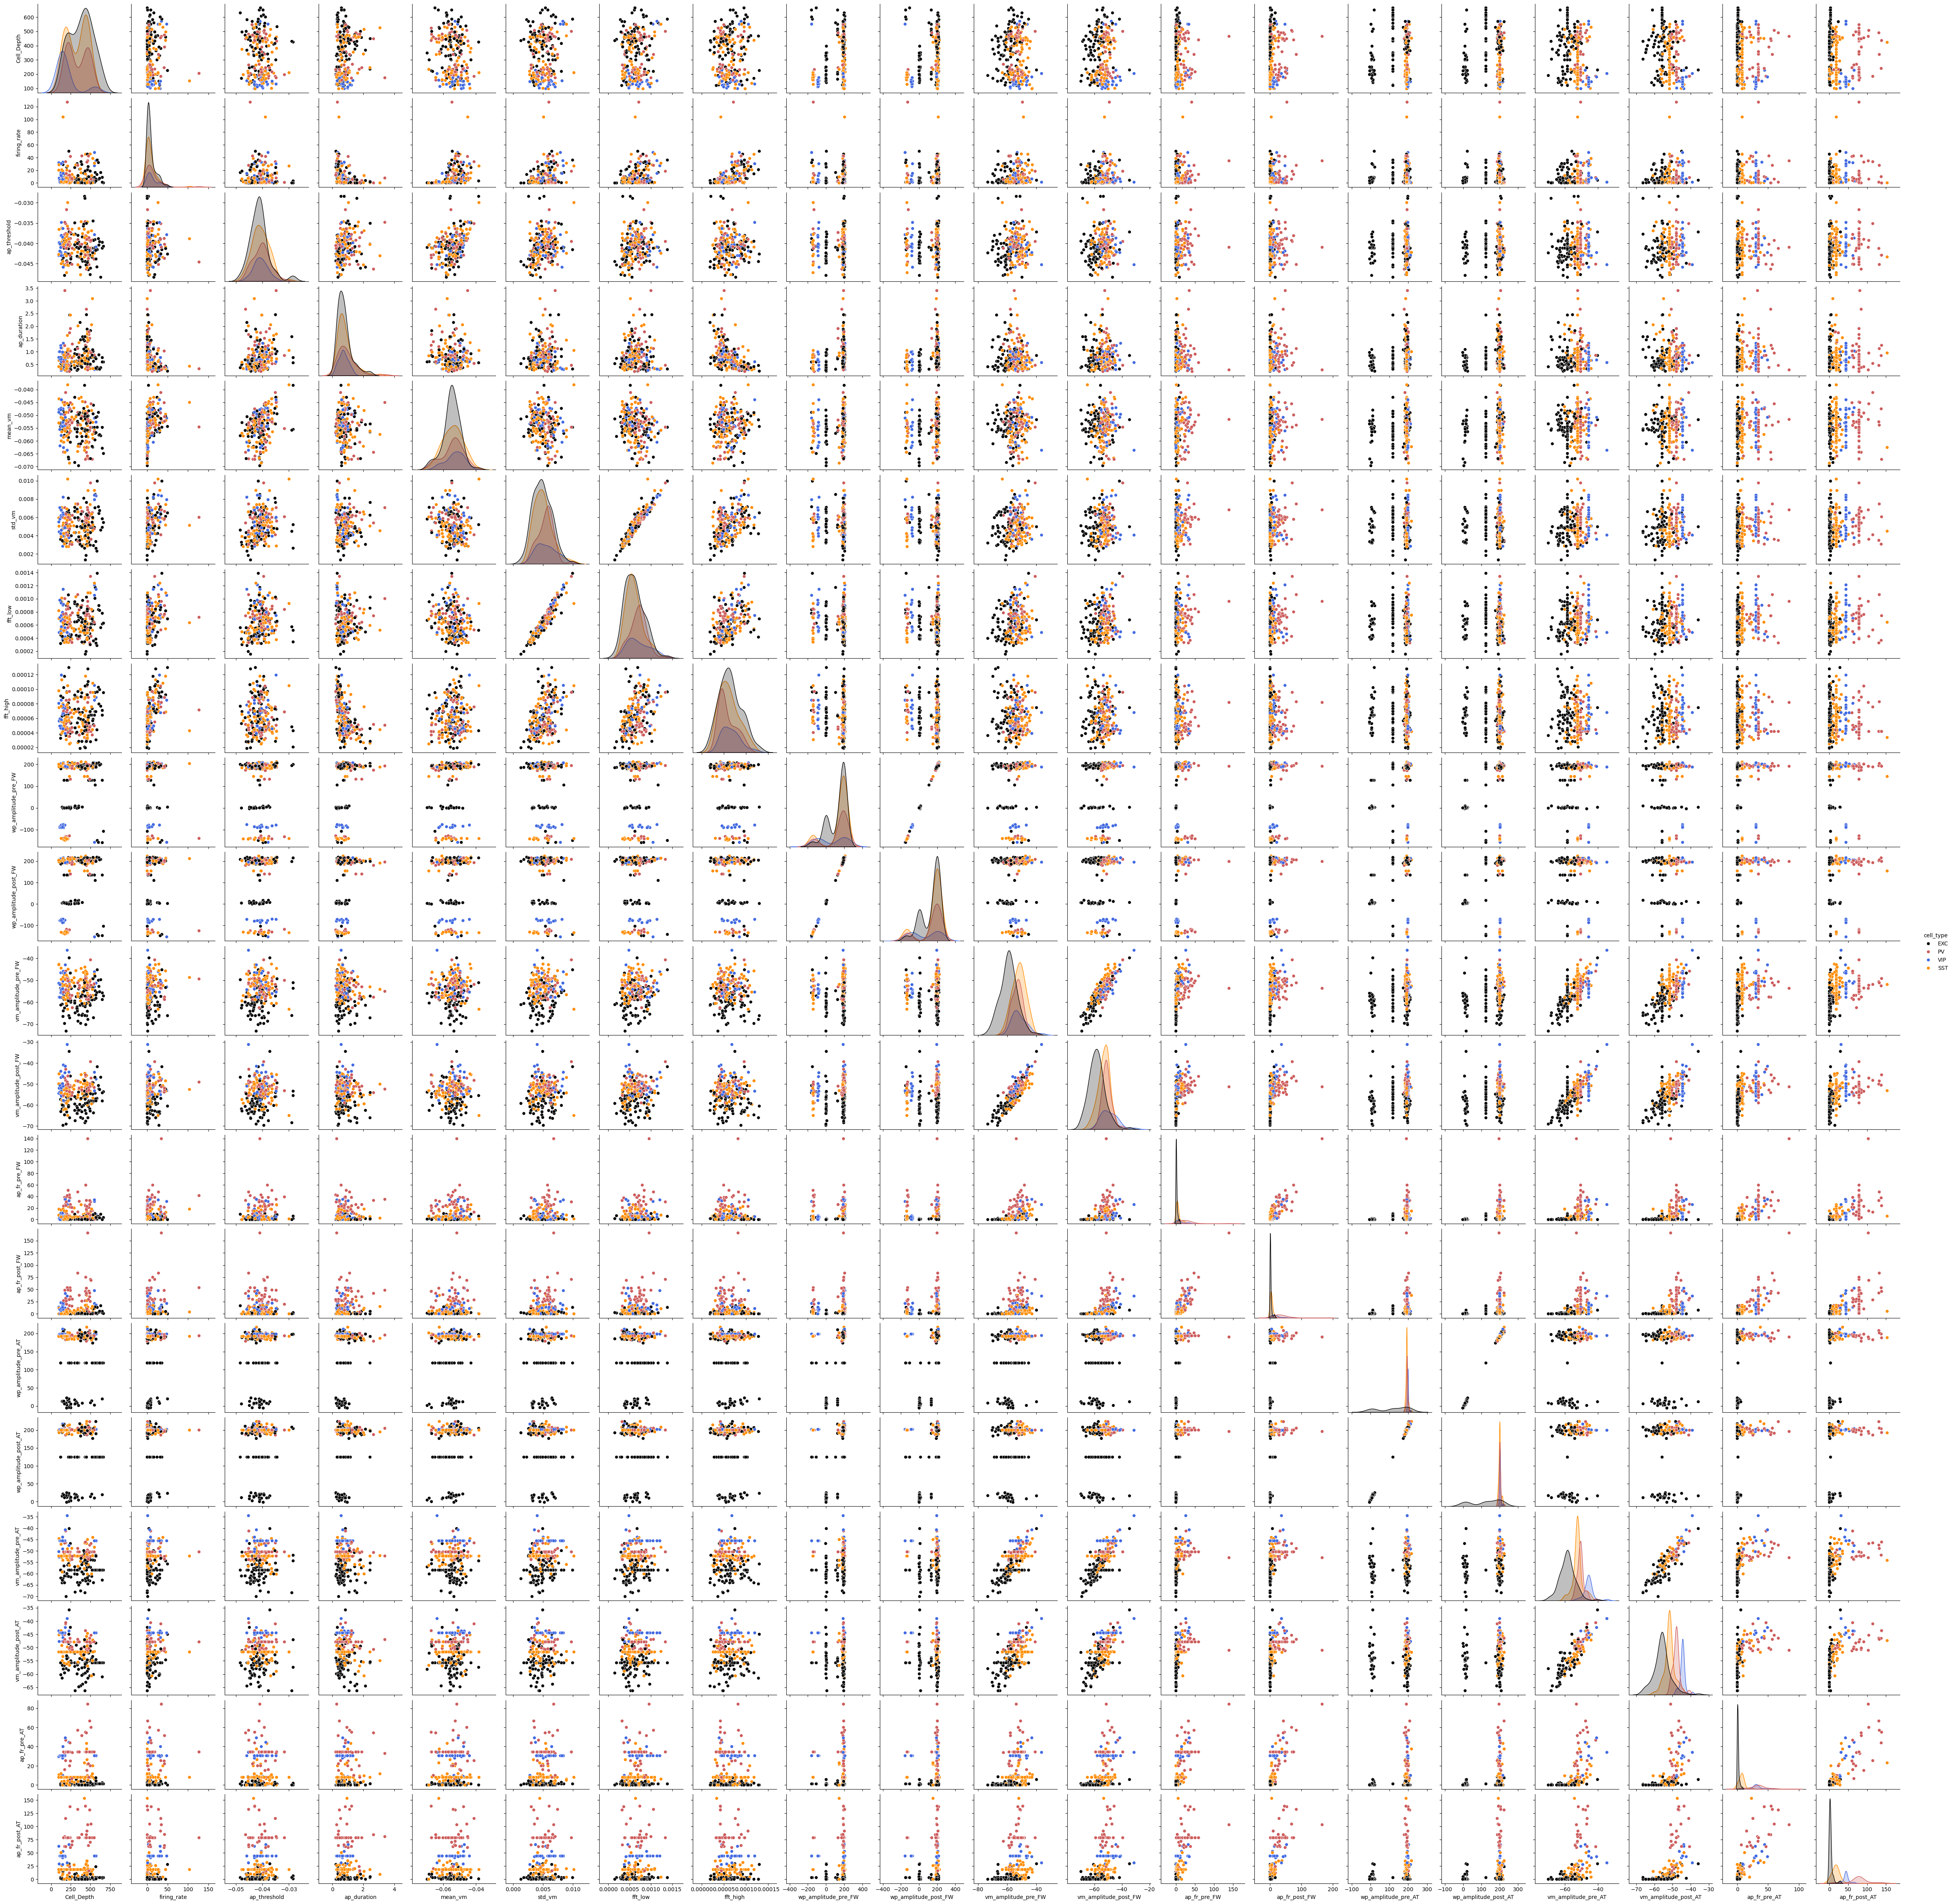

In [370]:
# all correlation 
sns.pairplot(data, hue='cell_type', palette=class_color)

#### Correlation between the two studies AT , FW  

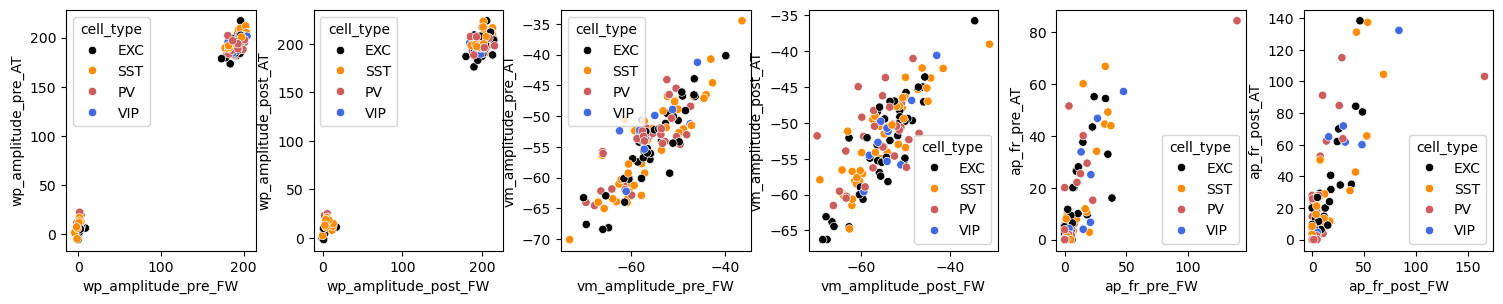

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(15, 3))
fig.tight_layout()
for i in range(6) :
    sns.scatterplot(x =data.iloc[:,9+i],  y=data.iloc[:,15+i], hue = data['cell_type'], ax= ax[i], palette=class_color)
    ax[i].set_xlabel(data.columns[9+i])
    ax[i].set_ylabel(data.columns[15+i])


#### boxplot to assess the variability

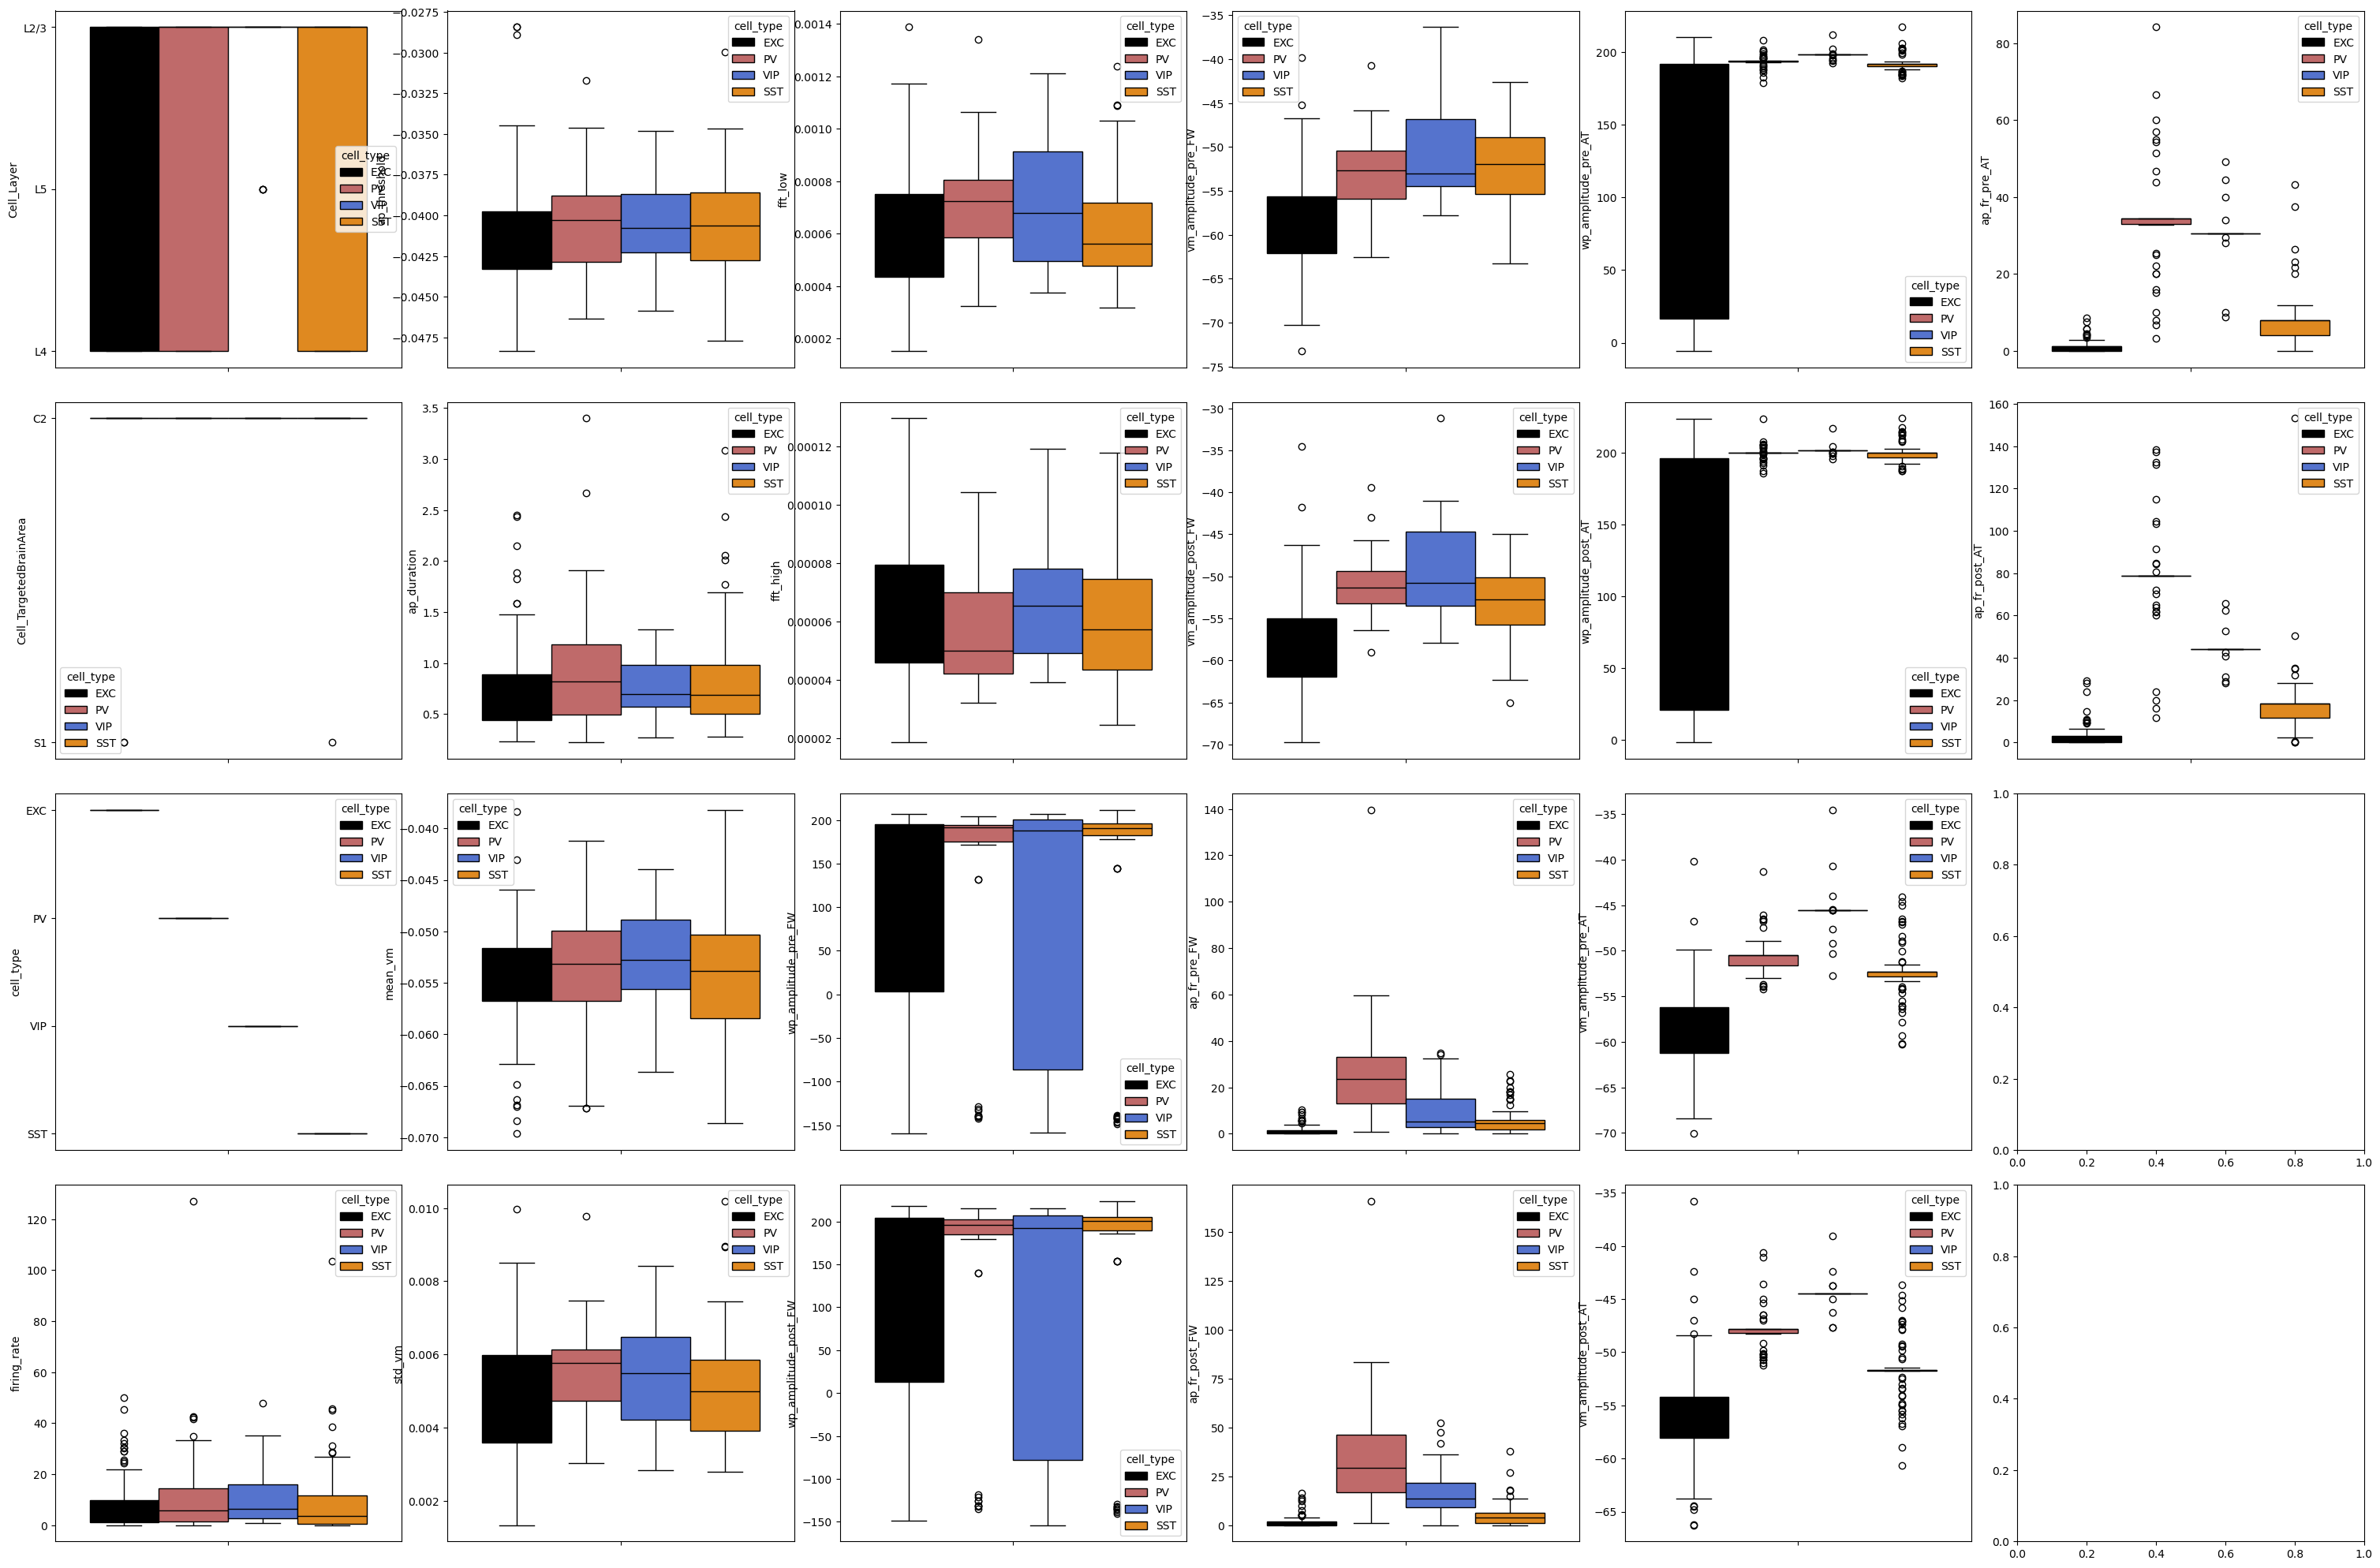

In [377]:
fig, axs= plt.subplots(4, 6, figsize = (30, 20))
fig.tight_layout()

col_to_plot = list(data.columns[2:]).copy()

for i, col in enumerate(col_to_plot):

    sns.boxplot(data,y= col, ax=axs[int(i%4)][int(i/4)], hue = 'cell_type', palette=class_color)

#### Class balance

<Axes: xlabel='cell_type', ylabel='Count'>

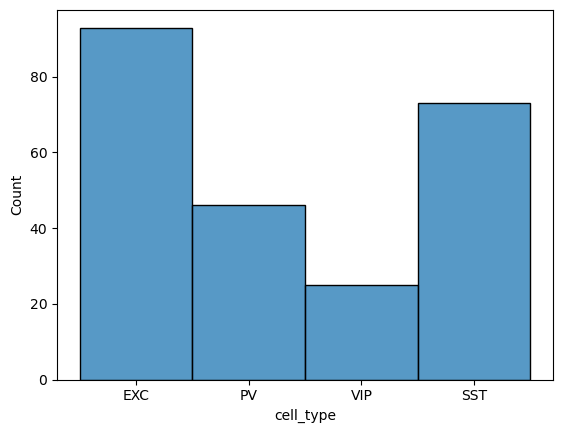

In [376]:
sns.histplot(data['cell_type'])

##### Transform categorical data into numerical ones with dummies 

In [388]:
######## Class label ###########
y = data.cell_type

# Numerical encoding 
#INHIBITORY vs EXITATORY (0 - 1 )
label_map = {'EXC' : 0, 'PV' : 1, 'VIP' : 1, 'SST' :1}
y_all = y.map(label_map)

# IF WANT TO LABEL THE INHIBITORY ONLY
label_map_inhib = {'PV' : 10, 'VIP' : 11, 'SST' :12} # you can change the label as you prefer here
y_inhib = y[y != 'EXC']
y_inhib = y_inhib.map(label_map_inhib)

######## Feature matrix ###########
X = data.copy()
X = X.drop(columns = ['cell_type', 'cell_id']) # drop the labels, drop the cell_id (we don't want them)

# Numerical encoding 
X = pd.get_dummies(X) * 1

## 3. PCA 